In [ ]:
!wget https://dphi-live.s3.eu-west-1.amazonaws.com/dataset/mangopests_dataset.zip

--2021-12-26 09:15:51--  https://dphi-live.s3.eu-west-1.amazonaws.com/dataset/mangopests_dataset.zip
Resolving dphi-live.s3.eu-west-1.amazonaws.com (dphi-live.s3.eu-west-1.amazonaws.com)... 52.218.62.0
Connecting to dphi-live.s3.eu-west-1.amazonaws.com (dphi-live.s3.eu-west-1.amazonaws.com)|52.218.62.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5305899330 (4.9G) [application/zip]
Saving to: ‘mangopests_dataset.zip’

mangopests_dataset. 100%[===================>]   4.94G  28.5MB/s    in 3m 1s   

2021-12-26 09:18:52 (28.0 MB/s) - ‘mangopests_dataset.zip’ saved [5305899330/5305899330]



In [ ]:
!7z x mangopests_dataset.zip -o/content/mangopests_dataset


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 5305899330 bytes (5061 MiB)

Extracting archive: mangopests_dataset.zip
  0% 256 Open              89% 41728 Open               
ERRORS:
Headers Error

--
Path = mangopests_dataset.zip
Type = zip
ERRORS:
Headers Error
Physical Size = 5305899330
64-bit = +

  0%      0% 108 - mangopests_dataset/test/Image_10094.jpg                                                    0% 246 - mangopests_dataset/test/Image_10218.jpg                                                  

In [ ]:
!rm mangopests_dataset.zip

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras import Sequential
from PIL import Image
import os

In [ ]:
train_label = pd.read_csv("./mangopests_dataset/mangopests_dataset/Training_set.csv")
train_label.head()

,filename,label
0,Image_1.jpg,normal
1,Image_2.jpg,procontarinia_rubus
2,Image_3.jpg,mictis_longicornis
3,Image_4.jpg,apoderus_javanicus
4,Image_5.jpg,normal


In [ ]:
from sklearn.utils import class_weight

class_array = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_label["label"].values),
    y=train_label["label"].values)

class_weights = dict(enumerate(class_array))
class_weights

{0: 0.5098684210526315,
 1: 2.421875,
 2: 2.767857142857143,
 3: 1.6145833333333333,
 4: 0.842391304347826,
 5: 1.0763888888888888,
 6: 2.421875,
 7: 1.1397058823529411,
 8: 6.458333333333333,
 9: 0.3799019607843137,
 10: 0.8806818181818182,
 11: 0.8806818181818182,
 12: 1.3839285714285714,
 13: 1.1397058823529411,
 14: 1.2109375,
 15: 0.5698529411764706}

(375, 500, 3)


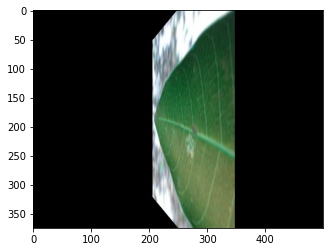

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

img_index = 2630 #from 1 to 13950
path = f'./mangopests_dataset/mangopests_dataset/test/Image_{img_index}.jpg'

img = cv2.imread(path)
plt.imshow(img)
print(img.shape)

In [ ]:
#removing black pixels from each side
def crop_image(path):
    img = Image.open(path)
    pix = np.array(img)
    j_min = 0
    j_max = pix.shape[1]
    for j in range(pix.shape[1]):
        if np.sum(pix[:,j]) > 1000: #treshold is set by trial and error
            break
        j_min += 1
    for j in range(pix.shape[1]-1, -1, -1):
        if np.sum(pix[:,j]) > 1000:
            break
        j_max -= 1
    return pix[:,j_min:j_max]

def save_nparray_as_image(arr, save_path):
    img = Image.fromarray(arr)
    img.save(save_path)

(375, 149, 3)


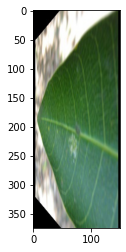

In [ ]:
#example of the image transformation
a = crop_image(path)
plt.imshow(a)
print(a.shape)

In [ ]:
n = len(os.listdir('./mangopests_dataset/mangopests_dataset/test/'))
for i in range(1, n+1):
    test_img_path = f'./mangopests_dataset/mangopests_dataset/test/Image_{i}.jpg'
    a = crop_image(test_img_path)
    save_nparray_as_image(a, test_img_path)
    if i%1000 == 0:
        print("finished ", i, " images")

finished  1000  images
finished  2000  images
finished  3000  images
finished  4000  images
finished  5000  images
finished  6000  images
finished  7000  images
finished  8000  images
finished  9000  images
finished  10000  images
finished  11000  images
finished  12000  images
finished  13000  images


In [ ]:
# Prepare to use imagedatagenerator

for label in train_label["label"]:
    tmp_path = f"./mangopests_dataset/mangopests_dataset/train/{label}"
    if not os.path.exists(tmp_path):
        os.makedirs(tmp_path)

img_path = './mangopests_dataset/mangopests_dataset/train/'
n = 0
for i,j in zip(train_label.filename, train_label.label): 
    try:
        train_img_path = img_path + i
        a = crop_image(train_img_path)
        save_nparray_as_image(a, train_img_path)
        os.rename(img_path + i, img_path + j + '/' + i)
        n += 1
        if n%1000 == 0:
            print("finished ", n, " images")
    except:
        pass

finished  1000  images
finished  2000  images
finished  3000  images
finished  4000  images
finished  5000  images
finished  6000  images
finished  7000  images
finished  8000  images
finished  9000  images
finished  10000  images
finished  11000  images
finished  12000  images
finished  13000  images
finished  14000  images
finished  15000  images
finished  16000  images
finished  17000  images
finished  18000  images
finished  19000  images
finished  20000  images
finished  21000  images
finished  22000  images
finished  23000  images
finished  24000  images
finished  25000  images
finished  26000  images
finished  27000  images
finished  28000  images
finished  29000  images
finished  30000  images
finished  31000  images
finished  32000  images


In [ ]:
target_img = (300, 200)
img_path = './mangopests_dataset/mangopests_dataset/train/'
validation_split = 0.1
batch_size = 100
set_seed = 2001

datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    horizontal_flip=True,
    # vertical_flip=True,
    width_shift_range=0.125,
    height_shift_range=[-0.15, 0.05],
    zoom_range=0.1,
    fill_mode = 'nearest',
    validation_split=validation_split,
    )

train_generator = datagen.flow_from_directory(
    img_path,
    target_size=target_img,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    seed=set_seed
    )

datagenval = ImageDataGenerator(
    rescale=1/255,
    validation_split=validation_split,
    )

validation_generator = datagenval.flow_from_directory(
    img_path,
    target_size=target_img,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    seed=set_seed
    )

Found 29298 images belonging to 16 classes.
Found 3252 images belonging to 16 classes.


## Build and train the model

execute the following cell in order to remove GPU from visible devices if it doesn't have enough memory to hold all the parameters. The training will be then done on the CPU

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3327915705643046019
 xla_global_id: -1]

In [ ]:
from tensorflow.keras.applications import DenseNet201, vgg19, vgg16

number_of_classes = len(np.unique(train_label["label"]))

model1 = Sequential()
pretrained_layer = vgg19.VGG19(include_top=False, pooling=None, input_shape=(*target_img,3))
retrain_bool = False
for layer in pretrained_layer.layers:
    layer.trainable = retrain_bool
    
model1.add(pretrained_layer)
model1.add(layers.MaxPool2D())
#model1.add(layers.Conv2D(512, kernel_size=(3,3)))
#model1.add(layers.MaxPool2D())
model1.add(layers.Flatten())
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(number_of_classes, activation='softmax'))

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics= ['acc'])
# I choosed a relatively high learning rate at first since the vgg19 layers are not trainable and the accuracy at first start at 0.08 so the learning can
# progress rapidely, ofc I implemented reduce_lr callback to reduce lr when needed
model1.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 9, 6, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 3, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 batch_normalization (BatchN  (None, 6144)             24576     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               1573120   
                                                         

Load the model wieghts

In [ ]:
#from google.colab import files
#files.upload()

Saving model_weighs.h5 to model_weighs.h5


In [ ]:
#model1.load_weights('model_weighs.h5')

Training

In [ ]:
EPOCHS = 15
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=4,
restore_best_weights=True,
verbose=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_acc", 
                              factor = .3,
                              patience = 2,
                              verbose = 1, 
                              min_delta = 0.001)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = './model_weights.h5', 
                             monitor='val_acc', 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = "max")


history = model1.fit(train_generator,
callbacks=[es_callback, reduce_lr, checkpoint],
validation_data=validation_generator, 
epochs=EPOCHS,
class_weight=class_weights,
verbose = 1)
model1.save(f'first_model1_{max(history.history["val_acc"])}.h5')
from google.colab import files
files.download(f'first_model1_{max(history.history["val_acc"])}.h5')

Epoch 1/15
293/293 [==============================] - ETA: 0s - loss: 0.6380 - acc: 0.8661
Epoch 00001: val_acc improved from -inf to 0.92251, saving model to ./model_weighs.h5
293/293 [==============================] - 1267s 4s/step - loss: 0.6380 - acc: 0.8661 - val_loss: 0.2971 - val_acc: 0.9225 - lr: 1.0000e-05
Epoch 2/15
293/293 [==============================] - ETA: 0s - loss: 0.7198 - acc: 0.8535
Epoch 00002: val_acc did not improve from 0.92251
293/293 [==============================] - 1244s 4s/step - loss: 0.7198 - acc: 0.8535 - val_loss: 0.3873 - val_acc: 0.9090 - lr: 1.0000e-05
Epoch 3/15
293/293 [==============================] - ETA: 0s - loss: 0.4524 - acc: 0.8971
Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.9999999242136253e-06.

Epoch 00003: val_acc did not improve from 0.92251
293/293 [==============================] - 1246s 4s/step - loss: 0.4524 - acc: 0.8971 - val_loss: 1.5771 - val_acc: 0.7528 - lr: 1.0000e-05
Epoch 4/15
293/293 [===================

In [ ]:
#now we will fine tune the weights of the vgg19 layers so they fit more our need
#It can be faster to just retrain the last convolutional layer
retrain_bool = True
for layer in pretrained_layer.layers:
    layer.trainable = retrain_bool

In [ ]:
#Don't forget to reduce the lr is really important otherwise you lose the pretrained weights and end up retraining vgg19 layers
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics= ['acc'])
model1.summary()
# now I re-executed the Training cell

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 9, 6, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 3, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 batch_normalization (BatchN  (None, 6144)             24576     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               1573120   
                                                                 
 dense_1 (Dense)             (None, 256)               6

Saving results

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1/255.,
    )

folder_path='./mangopests_dataset/mangopests_dataset/test/'

if not os.path.exists('./mangopests_dataset/mangopests_dataset/test/test'):
        os.makedirs('./mangopests_dataset/mangopests_dataset/test/test')
        
for img_name in os.listdir(folder_path):
    if img_name!="test":
        os.rename(folder_path + img_name, './mangopests_dataset/mangopests_dataset/test/test/' + img_name)

test_generator = test_datagen.flow_from_directory(
    folder_path,
    # only read images from test directory
    # color_mode='grayscale',
    # don't generate labels
    class_mode=None,
    shuffle=False,
    target_size=target_img
    )

In [ ]:
pred = model1.predict(test_generator)

In [ ]:
label_transformer = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))
label_transformer

In [ ]:
# flow_from_directory doesn't fetch the image in the natural order 1,2,3,... but in the order of os.listdir
os.listdir('./mangopests_dataset/test/test')[:10]

In [ ]:
pred_labels = np.array([label_transformer[np.argmax(p)] for p in pred])
pred_labels

In [ ]:
mapping = dict(zip(os.listdir('./mangopests_dataset/test/test'), pred_labels))

In [ ]:
img_name = ["Image_"+str(i)+".jpg" for i in range(1,len(pred)+1)]
pred_labels_in_order = [mapping[img] for img in img_name]

In [ ]:
col = [[img, p] for img,p in zip(img_name, pred_labels_in_order)]
df = pd.DataFrame(col, columns=['filename', 'label'])
df.head()

In [ ]:
# you can make the the prediction file name contain date_and_time to not overwrite previous attemps if needed
df.to_csv('prediction.csv', index=False)

In [ ]:
from google.colab import files
files.download('prediction.csv')